In [124]:
import numpy as np
import os
from skimage.measure import block_reduce
from scipy.misc import imread
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys
import optparse
from libtiff import TIFF
from PIL import Image
import re
import itertools
from scipy import ndimage

import math
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.cm as cm
import pandas as pd

%matplotlib inline


In [346]:
# # outdir = '/media/juliana/TOSHIBA EXT/widefield/CE004/20160203/awake_circle_0013_REV/structs'
# # outdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013_REV/structs'
# outdir = '/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_circle_013Hz/structs'

# # outdir = '/media/nas/volume1/widefield/data/JR009/20150709/20150709_JR009_500um_05Hz_nored/structs' #V-Left ok
# circle = True

outdir = '/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_bar_013Hz/structs'

# reduceit = 0

# if circle:
#     CW = True #options.rev # CW IS REVERSE
#     if CW:
#         rev = True
#     print "REV STATE: ", CW
#     if rev=='False' and '_CW' in outdir:
#         print "Fixing REV status [CW detected in fn]..."
#         CW = True

#     key = 'stimulus' #options.key
    
#     rundir = os.path.split(outdir)[0]
#     sessiondir = os.path.split(rundir)[0]
    
# else:
#     sessiondir = os.path.split(outdir)[0]
    
exptdir = os.path.split(outdir)[0]
print exptdir

/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_bar_013Hz


In [347]:

winsize = [1920, 1200]
screen_size = [int(i*0.25) for i in winsize]
print screen_size

create_legend = 1

if create_legend:
    V_left_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, -1*math.pi, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_left_legend[i][0:screen_size[0]/2] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(1*math.pi, 0, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_left_legend[i][screen_size[0]/2:] = nspaces_end
        
else:
    legend_name = 'V-Left_legend.tif'
    V_left_legend = imread(os.path.join(legend_dir, legend_name))

    
if create_legend:
    V_right_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, 1*math.pi, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_right_legend[i][0:screen_size[0]/2] = nspaces_start
    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(-1*math.pi, 0, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_right_legend[i][screen_size[0]/2:] = nspaces_end
        
else:
    legend_name = 'V-Right_legend.tif'
    V_right_legend = imread(os.path.join(legend_dir, legend_name))

    
if create_legend:        
    H_down_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, -1*math.pi, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_down_legend[0:screen_size[1]/2, i] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(1*math.pi, 0, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_down_legend[screen_size[1]/2:, i] = nspaces_end
        
else:
    legend_name = 'H-Down_legend.tif'
    H_down_legend = imread(os.path.join(legend_dir, legend_name))


if create_legend:
    H_up_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, 1*math.pi, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_up_legend[0:screen_size[1]/2, i] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(-1*math.pi, 0, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_up_legend[screen_size[1]/2:, i] = nspaces_end
else:
    legend_name = 'H-Up_legend.tif'
    H_up_legend = imread(os.path.join(legend_dir, legend_name))


[480, 300]


<matplotlib.colorbar.Colorbar instance at 0x7fa74bca25f0>

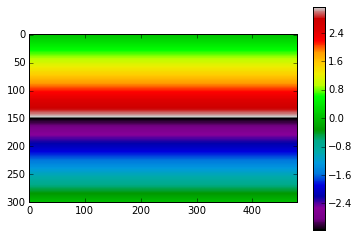

In [348]:
plt.imshow(H_up_legend, cmap='spectral');
plt.colorbar()

In [349]:
#################################################################################
# GET DATA STRUCT FILES:
#################################################################################

files = os.listdir(outdir)
files = [f for f in files if os.path.splitext(f)[1] == '.pkl']
dstructs = [f for f in files if 'Target_fft' in f]

print dstructs

D = dict()
for f in dstructs:
	outfile = os.path.join(outdir, f)
	with open(outfile,'rb') as fp:
		D[f] = pkl.load(fp)
print D.keys()


OSError: [Errno 2] No such file or directory: '/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_bar_013Hz/structs'

In [ ]:
# # Choose stimulus key:
# if circle:
#     if CW:
#         cwkey = D.keys()[0]
#         cwmap = D[cwkey]['ft']
        
#     else:
#         ccwkey = D.keys()[0]
#         ccwmap = D[ccwkey]['ft']
    
#     append = 'detrendfirst'
    
    
# else:
print "Choose key..."

run_num = '1'
reduce_factor = (1,1) #(2, 2)
append = '' #detrendfirst'
cond_type = 'Right'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in D.keys() if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print D.keys()
else:
    if cond_type=='Left':
        leftkey = tmp_keys[0]
    elif cond_type=='Right':
        rightkey = tmp_keys[0]
    elif cond_type=='Down' or cond_type=='Top':
        topkey = tmp_keys[0]
    elif cond_type=='Up' or cond_type=='Bottom':
        bottomkey = tmp_keys[0]          
        
curr_key = tmp_keys[0]
# curr_key = leftkey
curr_map = D[curr_key]['ft']


reduce_factor = (2, 2)
if reduce_factor[0] > 0:
	reduceit=1
else:
	reduceit=0

colormap = 'spectral'

print "Current key: ", curr_key
plt.subplot(1,2,1)
plt.imshow(np.angle(curr_map), cmap=colormap)
print "Curr DIR: ", outdir
plt.axis('off')

if 'Left' in curr_key or 'Right' in curr_key:
    imname = 'AZ_HSV_%s' % curr_key
    if 'Left' in curr_key:
        legend = V_left_legend
    else:
        legend = V_right_legend
else:
    imname = 'EL_HSV_%s' % curr_key  
    if 'Top' in curr_key or 'Down' in curr_key:
        legend = H_down_legend
    else:
        legend = H_up_legend
plt.subplot(1,2,2)
plt.imshow(legend, cmap=colormap)
plt.axis('off')

In [350]:
# ft = np.empty(D[cw_key]['mean_intensity'].shape)
# ft = ft + 0j

# for x in range(ft.shape[0]):
#     for y in range(ft.shape[1]):
#         ft[x, y] = complex(D[cw_key]['ft_real'][x][y], D[cw_key]['ft_imag'][x][y])

# D[cw_key]['ft'] = ft


/media/nas/volume1/widefield/data/JR017W/20160817
['16bitSurf (5)_surface.tif']
.tif


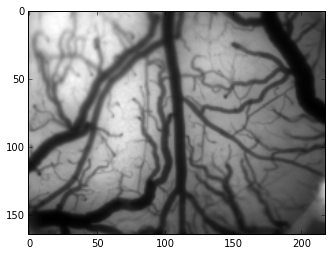

In [351]:
#################################################################################
# GET BLOOD VESSEL IMAGE:
#################################################################################
sessiondir = os.path.split(exptdir)[0]
print sessiondir
folders = os.listdir(sessiondir)
# figpath = [f for f in folders if f == 'figures']
figpath = [f for f in folders if f == 'surface']


if figpath:
    figdir = figpath[0]
    tmp_ims = os.listdir(os.path.join(sessiondir, figdir))
    surface_words = ['surface', 'GREEN', 'green', 'Surface', 'Surf']
    ims = [i for i in tmp_ims if any([word in i for word in surface_words])]
    ims = [i for i in ims if '_' in i]
    print ims
    impath = os.path.join(sessiondir, figdir, ims[0])
    # image = Image.open(impath) #.convert('L')
    # imarray = np.asarray(image)
    print os.path.splitext(impath)[1]
    if os.path.splitext(impath)[1] == '.tif':
        tiff = TIFF.open(impath, mode='r')
        surface = tiff.read_image().astype('float')
        tiff.close()
        plt.imshow(surface)
    else:
        image = Image.open(impath) #.convert('L')
        surface = np.asarray(image)


else: # NO BLOOD VESSEL IMAGE...
    surface = np.zeros([200,300])

reduceit = 0
if reduceit:
    surface = block_reduce(surface, reduce_factor, func=np.mean)

plt.imshow(surface, cmap='gray')

(-0.5, 217.5, 163.5, -0.5)

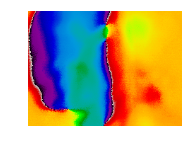

In [352]:
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(curr_map), cmap='spectral')
plt.axis('off')

# if circle:
#     ax = fig.add_subplot(1,2,2, projection='polar')
#     ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...

#     ax._direction = 2*np.pi # object moves toward bottom first (CW)

#     # ax._direction = -2*np.pi # objecct moves toward top first (CCW)

#     norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
#     #norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
#     cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
#                                     norm=norm, orientation='horizontal')
#     # cb.ax.invert_xaxis()
#     # cb.outline.set_visible(False)
#     # ax.set_axis_off()
#     ax.set_rlim([-1, 1])
#     ax.axis('off')



(-0.5, 479.5, 299.5, -0.5)

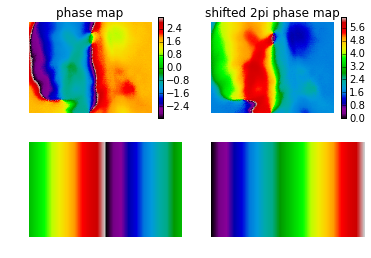

In [353]:

plt.subplot(2,2,1)
phase_map = np.angle(curr_map)
plt.imshow(phase_map, cmap=colormap)
plt.colorbar()
plt.axis('off')
plt.title('phase map')

plt.subplot(2,2,2)
shifted_phase_map = np.angle(curr_map)
for x in range(shifted_phase_map.shape[0]):
    for y in range(shifted_phase_map.shape[1]):
        if shifted_phase_map[x,y] < 0:
            shifted_phase_map[x,y] += 2*math.pi
            
plt.imshow(shifted_phase_map, cmap=colormap)
plt.colorbar()
plt.axis('off')
plt.title('shifted 2pi phase map')

plt.subplot(2,2,3)
plt.imshow(legend, cmap=colormap)
plt.axis('off')


plt.subplot(2,2,4)
import copy
shifted_legend = copy.deepcopy(legend)
for x in range(shifted_legend.shape[0]):
    for y in range(shifted_legend.shape[1]):
        if shifted_legend[x,y] < 0:
            shifted_legend[x,y] += 2*math.pi
plt.imshow(shifted_legend, cmap=colormap)
plt.axis('off')

(164, 218)
(164, 218)
(164, 218)


IOError: [Errno 2] No such file or directory: '/media/nas/volume1/widefield/data/JR017W/20160817/JR017W_bar_013Hz/structs/Target_fft_Right_run1_(1, 1)_.pkl.svg'

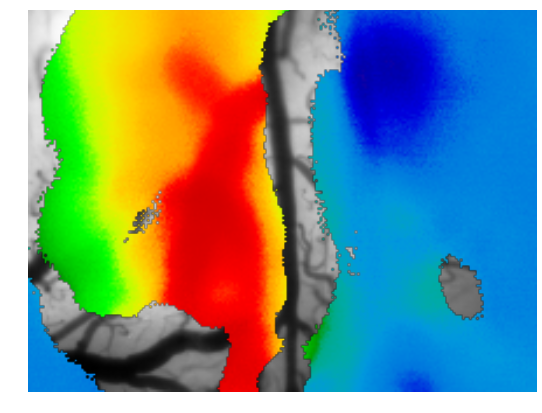

In [354]:
#SHIFTED:

fig = plt.figure(figsize=(20,10))

p = shifted_phase_map
print p.shape
# fig.add_subplot(1,2,1)
# plt.imshow(p, cmap='spectral')
# plt.axis('off')
# # plt.colorbar()  # Just make sure goes from 0 to 2pi now...l

use_mean_intensity = 0 # set to 1 if want to threshold with mean intensity values instead of magnitude
use_log = 1
threshold = 0.50
Ny = len(D[curr_key]['freqs'])/2.
mag_map = D[curr_key]['mag_map']/Ny
print mag_map.shape
# phase_map = D[curr_key]['phase_map']

#-----------------------------------------------------------------
# Overlaid Phase-map, thresholded
#-----------------------------------------------------------------

fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,2,1)
plt.imshow(surface,cmap=cm.Greys_r)
print surface.shape

if use_mean_intensity:
    mean_intensity = D[cur_key]['mean_intensity']
    [x, y] = np.where(mean_intensity >= threshold*mean_intensity.max())
    phase_mask = np.ones(mean_intensity.shape) * 100
    # phase_mask[x, y] = phase_map[x, y]
    phase_mask[x, y] = p[x, y] #D[curr_key]['phase_map'][x, y]
    tit = 'Threshold, %.2f of mean intensity max' % (threshold)
else:
    if use_log:
        [x, y] = np.where(np.log(mag_map) >= threshold * np.log(mag_map.max()))
    else:
        [x, y] = np.where(mag_map >= threshold * mag_map.max())
    phase_mask = np.ones(mag_map.shape) * 100
    phase_mask[x, y] = p[x,y] #phase_map[x, y]
    tit = 'Threshold, %.2f of log max magnitude' % (threshold)

[nullx, nully] = np.where(phase_mask == 100)
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=0*math.pi, vmax=2*math.pi)
plt.axis('off')




# ADDL  shifted color wheeL


# if circle:
# #     fig = plt.figure()
#     ax = fig.add_subplot(1,2,2, projection='polar')
#     ax.set_theta_zero_location('E') # W puts 0 on RIGHT side... need to flip around to EAST for shifted wheel

#     ax._direction = 2*np.pi # object moves toward bottom first (CW)

#     # ax._direction = -2*np.pi # objecct moves toward top first (CCW)

#     norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0*np.pi)
#     #norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
#     cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
#                                     norm=norm, orientation='horizontal')
#     # cb.ax.invert_xaxis()
#     # cb.outline.set_visible(False)
#     # ax.set_axis_off()
#     ax.set_rlim([-1, 1])
#     ax.axis('off')

# if circle:
#     if CW:
#         imname = 'SHIFT_overlayphase_CW_phase_map_%s' % (append)
#     else:
#         imname = 'SHIFT_overlayphase_CCW_phase_map_%s' % (append)
imname = curr_key

impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')

print impath

In [ ]:
if circle:
    fig = plt.figure()
    ax = fig.add_subplot(1,2,2, projection='polar')
    ax.set_theta_zero_location('E') # W puts 0 on RIGHT side...

    ax._direction = 2*np.pi # object moves toward bottom first (CW)

    # ax._direction = -2*np.pi # objecct moves toward top first (CCW)

    norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0*np.pi)
    #norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
    cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
                                    norm=norm, orientation='horizontal')
    # cb.ax.invert_xaxis()
    # cb.outline.set_visible(False)
    # ax.set_axis_off()
    ax.set_rlim([-1, 1])
    ax.axis('off')


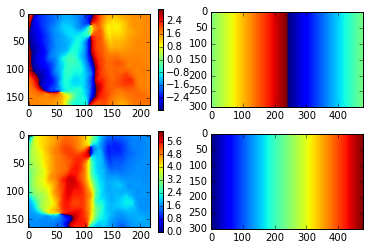

In [355]:
# old_min = -math.pi #phase_map.min()
# old_max = math.pi #phase_map.max()
# new_min = 0
# new_max = 1
# normed_phase_map = np.zeros(phase_map.shape)
# for x in range(phase_map.shape[0]):
#     for y in range(phase_map.shape[1]):
#         old_val = phase_map[x, y]
#         normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

# old_min = -math.pi #phase_map.min()
# old_max = math.pi #phase_map.max()
# new_min = 0
# new_max = 1

import copy
cont_phase_map = copy.deepcopy(phase_map)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        if cont_phase_map[x, y] < 0:
             cont_phase_map[x, y] += 2*math.pi
                
cont_legend = copy.deepcopy(legend)
for x in range(legend.shape[0]):
    for y in range(legend.shape[1]):
        if cont_legend[x, y] < 0:
             cont_legend[x, y] += 2*math.pi
                
plt.subplot(2,2,1)
plt.imshow(phase_map)
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(legend)

plt.subplot(2,2,3)
plt.imshow(cont_phase_map)
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(cont_legend)
        

<matplotlib.colorbar.Colorbar instance at 0x7fa74b100950>

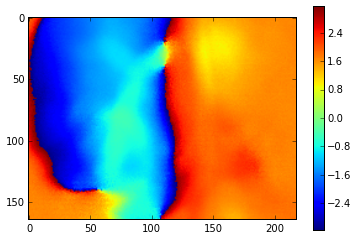

In [356]:
# TRY SMALL PART:
# p = cont_phase_map[60:120,20:200]

# TRY CRUDE THRESH:
# p = phase_mask
p = phase_map
plt.imshow(p)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fa74a37b440>

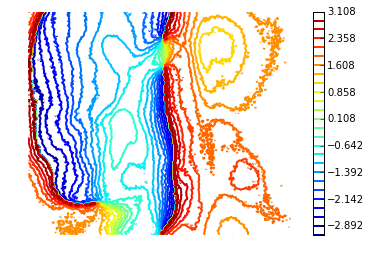

In [366]:
# Contour??
# cmap = cm.PRGn


rightkey = 'Target_fft_Right_run1_(1, 1)_.pkl'
rightmap = D[rightkey]['phase_map']

# levels = np.arange(-2.0, 1.601, 0.4)  # Boost the upper limit to avoid truncation errors.
levels = np.arange(-math.pi, math.pi, .25)  # Boost the upper limit to avoid truncation errors.
# levels = np.arange(0, 2*math.pi, 0.25)  # Boost the upper limit to avoid truncation errors.


# extent = (0, phase_map.shape[1], 0, phase_map.shape[0])

# im = plt.imshow(phase_map, origin='upper', extent=extent, cmap='jet', norm=norm)

# # ylim = plt.get(plt.gca(), 'ylim')
# # plt.setp(plt.gca(), ylim=ylim[::-1])
# v = plt.axis()
# plt.contour(phase_map, levels, hold='on', colors='k',
#         origin='upper', extent=extent)
# plt.axis(v)

# plt.title("Image, origin 'upper'")
# plt.colorbar(im)
# # plt.axis('off')

# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
# plt.imshow(phase_map)
# plt.axis('off')

# plt.subplot(1,2,2)
right_contour = plt.contour(rightmap, levels, origin='upper', linewidths=2)
plt.axis('off')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fa74a781ab8>

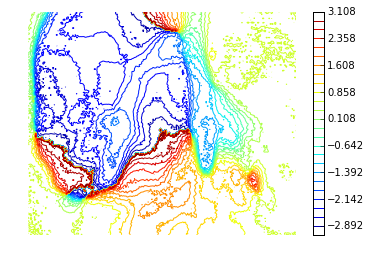

In [360]:
bottomkey = 'Target_fft_Bottom_run1_(1, 1)_.pkl'
bottommap = D[bottomkey]['phase_map']

bottom_contour = plt.contour(bottommap, levels, origin='upper')
plt.axis('off')
plt.colorbar()

(-0.5, 217.5, 163.5, -0.5)

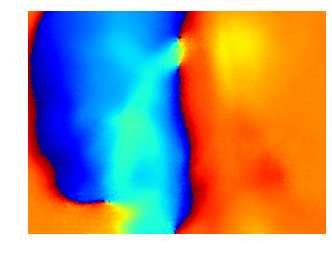

In [321]:
# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
plt.imshow(phase_map)
plt.axis('off')

<matplotlib.contour.QuadContourSet instance at 0x7fa74a8ff908>

In [287]:
def gradient_phase(f, *varargs, **kwargs):
    """
    Return the gradient of an N-dimensional array.

    The gradient is computed using second order accurate central differences
    in the interior and either first differences or second order accurate
    one-sides (forward or backwards) differences at the boundaries. The
    returned gradient hence has the same shape as the input array.

    Parameters
    ----------
    f : array_like
        An N-dimensional array containing samples of a scalar function.
    varargs : scalar or list of scalar, optional
        N scalars specifying the sample distances for each dimension,
        i.e. `dx`, `dy`, `dz`, ... Default distance: 1.
        single scalar specifies sample distance for all dimensions.
        if `axis` is given, the number of varargs must equal the number of axes.
    edge_order : {1, 2}, optional
        Gradient is calculated using N\ :sup:`th` order accurate differences
        at the boundaries. Default: 1.

        .. versionadded:: 1.9.1

    axis : None or int or tuple of ints, optional
        Gradient is calculated only along the given axis or axes
        The default (axis = None) is to calculate the gradient for all the axes of the input array.
        axis may be negative, in which case it counts from the last to the first axis.

        .. versionadded:: 1.11.0

    Returns
    -------
    gradient : list of ndarray
        Each element of `list` has the same shape as `f` giving the derivative
        of `f` with respect to each dimension.

    Examples
    --------
    >>> x = np.array([1, 2, 4, 7, 11, 16], dtype=np.float)
    >>> np.gradient(x)
    array([ 1. ,  1.5,  2.5,  3.5,  4.5,  5. ])
    >>> np.gradient(x, 2)
    array([ 0.5 ,  0.75,  1.25,  1.75,  2.25,  2.5 ])

    For two dimensional arrays, the return will be two arrays ordered by
    axis. In this example the first array stands for the gradient in
    rows and the second one in columns direction:

    >>> np.gradient(np.array([[1, 2, 6], [3, 4, 5]], dtype=np.float))
    [array([[ 2.,  2., -1.],
            [ 2.,  2., -1.]]), array([[ 1. ,  2.5,  4. ],
            [ 1. ,  1. ,  1. ]])]

    >>> x = np.array([0, 1, 2, 3, 4])
    >>> dx = np.gradient(x)
    >>> y = x**2
    >>> np.gradient(y, dx, edge_order=2)
    array([-0.,  2.,  4.,  6.,  8.])

    The axis keyword can be used to specify a subset of axes of which the gradient is calculated
    >>> np.gradient(np.array([[1, 2, 6], [3, 4, 5]], dtype=np.float), axis=0)
    array([[ 2.,  2., -1.],
           [ 2.,  2., -1.]])
    """
    f = np.asanyarray(f)
    N = len(f.shape)  # number of dimensions

    axes = kwargs.pop('axis', None)
    if axes is None:
        axes = tuple(range(N))
    # check axes to have correct type and no duplicate entries
    if isinstance(axes, int):
        axes = (axes,)
    if not isinstance(axes, tuple):
        raise TypeError("A tuple of integers or a single integer is required")

    # normalize axis values:
    axes = tuple(x + N if x < 0 else x for x in axes)
    if max(axes) >= N or min(axes) < 0:
        raise ValueError("'axis' entry is out of bounds")

    if len(set(axes)) != len(axes):
        raise ValueError("duplicate value in 'axis'")

    n = len(varargs)
    if n == 0:
        dx = [1.0]*N
    elif n == 1:
        dx = [varargs[0]]*N
    elif n == len(axes):
        dx = list(varargs)
    else:
        raise SyntaxError(
            "invalid number of arguments")

    edge_order = kwargs.pop('edge_order', 1)
    if kwargs:
        raise TypeError('"{}" are not valid keyword arguments.'.format(
                                                  '", "'.join(kwargs.keys())))
    if edge_order > 2:
        raise ValueError("'edge_order' greater than 2 not supported")

    # use central differences on interior and one-sided differences on the
    # endpoints. This preserves second order-accuracy over the full domain.

    outvals = []

    # create slice objects --- initially all are [:, :, ..., :]
    slice1 = [slice(None)]*N
    slice2 = [slice(None)]*N
    slice3 = [slice(None)]*N
    slice4 = [slice(None)]*N

    otype = f.dtype.char
    if otype not in ['f', 'd', 'F', 'D', 'm', 'M']:
        otype = 'd'

    # Difference of datetime64 elements results in timedelta64
    if otype == 'M':
        # Need to use the full dtype name because it contains unit information
        otype = f.dtype.name.replace('datetime', 'timedelta')
    elif otype == 'm':
        # Needs to keep the specific units, can't be a general unit
        otype = f.dtype

    # Convert datetime64 data into ints. Make dummy variable `y`
    # that is a view of ints if the data is datetime64, otherwise
    # just set y equal to the array `f`.
    if f.dtype.char in ["M", "m"]:
        y = f.view('int64')
    else:
        y = f

    for i, axis in enumerate(axes):

        if y.shape[axis] < 2:
            raise ValueError(
                "Shape of array too small to calculate a numerical gradient, "
                "at least two elements are required.")
        
        # Numerical differentiation: 1st order edges, 2nd order interior
        if y.shape[axis] == 2 or edge_order == 1:
            
            # Use first order differences for time data
            out = np.empty_like(y, dtype=otype)

            slice1[axis] = slice(1, -1)
            slice2[axis] = slice(2, None)
            slice3[axis] = slice(None, -2)
            # 1D equivalent -- out[1:-1] = (y[2:] - y[:-2])/2.0
            out[slice1] = (y[slice2] - y[slice3])
            out[slice1] = (out[slice1] + math.pi) % (2*math.pi) - math.pi
            out[slice1]=out[slice1]/2.0

            slice1[axis] = 0
            slice2[axis] = 1
            slice3[axis] = 0
            # 1D equivalent -- out[0] = (y[1] - y[0])
            out[slice1] = (y[slice2] - y[slice3])
            out[slice1] = (out[slice1] + math.pi) % (2*math.pi) - math.pi

            slice1[axis] = -1
            slice2[axis] = -1
            slice3[axis] = -2
            # 1D equivalent -- out[-1] = (y[-1] - y[-2])
            out[slice1] = (y[slice2] - y[slice3])
            out[slice1] = (out[slice1] + math.pi) % (2*math.pi) - math.pi

        # Numerical differentiation: 2st order edges, 2nd order interior
        else:
            # Use second order differences where possible
            out = np.empty_like(y, dtype=otype)

            slice1[axis] = slice(1, -1)
            slice2[axis] = slice(2, None)
            slice3[axis] = slice(None, -2)
            # 1D equivalent -- out[1:-1] = (y[2:] - y[:-2])/2.0
            out[slice1] = (y[slice2] - y[slice3])
            out[slice1] = (out[slice1] + math.pi) % (2*math.pi) - math.pi
            out[slice1] = out[slice1]/2

            slice1[axis] = 0
            slice2[axis] = 0
            slice3[axis] = 1
            slice4[axis] = 2
            # 1D equivalent -- out[0] = -(3*y[0] - 4*y[1] + y[2]) / 2.0
            out[slice1] = -(3.0*y[slice2] - 4.0*y[slice3] + y[slice4])
            out[slice1] = (out[slice1] + math.pi) % (2*math.pi) - math.pi
            out[slice1]=out[slice1]/2.0

            slice1[axis] = -1
            slice2[axis] = -1
            slice3[axis] = -2
            slice4[axis] = -3
            # 1D equivalent -- out[-1] = (3*y[-1] - 4*y[-2] + y[-3])
            out[slice1] = (3.0*y[slice2] - 4.0*y[slice3] + y[slice4])
            out[slice1] = (out[slice1] + math.pi) % (2*math.pi) - math.pi
            out[slice1]=out[slice1]/2.0

        # divide by step size
        out /= dx[i]
        outvals.append(out)

        # reset the slice object in this dimension to ":"
        slice1[axis] = slice(None)
        slice2[axis] = slice(None)
        slice3[axis] = slice(None)
        slice4[axis] = slice(None)

    if len(axes) == 1:
        return outvals[0]
    else:
        return outvals

164


<matplotlib.colorbar.Colorbar instance at 0x7fa7527cf5f0>

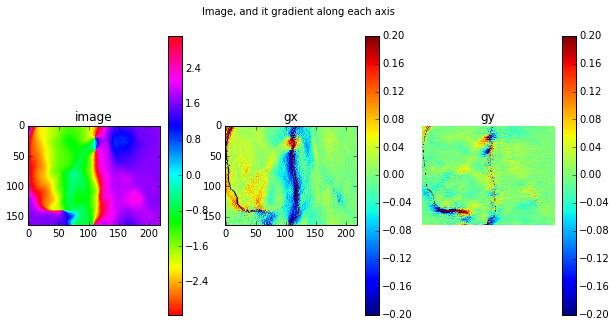

In [299]:

# plt.imshow(p)
# gy, gx = np.gradient(p)
gy, gx = gradient(p)
print len(gy)
# print "gx =", gx
# print "gy =", gy

# plotting
# plt.close("all")
# plt.figure()

plt.figure(figsize=(10,5))
plt.suptitle("Image, and it gradient along each axis")

plt.subplot("131")
# ax.axis("off")
plt.imshow(p, cmap='hsv')
plt.title("image")
plt.colorbar()

plt.subplot("132")
# ax.axis("off")
plt.imshow(gx, cmap='jet', vmin=-0.2, vmax=0.2)
plt.title("gx")
plt.colorbar()

plt.subplot("133")
plt.axis("off")
plt.imshow(gy, cmap='jet', vmin=-0.2, vmax=0.2)
plt.title('gy')
plt.colorbar()




164


<matplotlib.colorbar.Colorbar instance at 0x7fa750eac3b0>

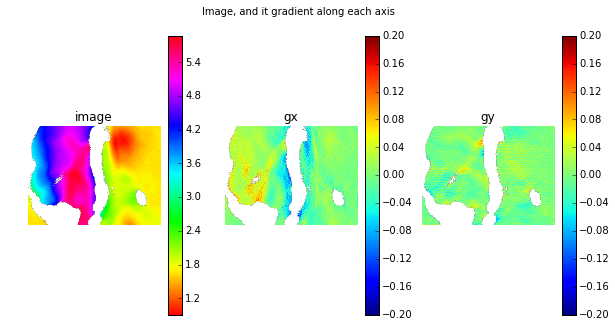

In [302]:
# p = np.flipud(shifted_phase_map)
# p = shifted_phase_map
        
p = phase_mask #cont_phase_map #phase_mask


# plt.imshow(p)
# gy, gx = np.gradient(p)
gy, gx = gradient_phase(p)
print len(gy)
# print "gx =", gx
# print "gy =", gy

plt.figure(figsize=(10,5))
plt.suptitle("Image, and it gradient along each axis")

plt.subplot("131")
plt.axis("off")
plt.imshow(p, cmap='hsv')
plt.title("image")
plt.colorbar()

plt.subplot("132")
plt.axis("off")
plt.imshow(gx, cmap='jet', vmin=-0.2, vmax=0.2)
plt.title("gx")
plt.colorbar()

plt.subplot("133")
plt.axis("off")
plt.imshow(gy, cmap='jet', vmin=-0.2, vmax=0.2)
plt.title('gy')
plt.colorbar()



In [292]:
print gx

[[ 0.06361046  0.10109579  0.02482634 ..., -0.00064058 -0.01434272
  -0.01925152]
 [ 0.01902152 -0.00621474 -0.00281856 ..., -0.02163205 -0.00502232
  -0.01868685]
 [ 0.00582435  0.04161849  0.10772814 ..., -0.00652699 -0.00188046
  -0.0278481 ]
 ..., 
 [ 0.03055293  0.02245119  0.00736787 ..., -0.00230003  0.00894533
   0.01124889]
 [ 0.03016901  0.0137462  -0.00281432 ..., -0.01036362  0.00494451
   0.01469964]
 [ 0.00487127  0.02411905  0.00162522 ..., -0.00747926  0.00446384
   0.00841228]]


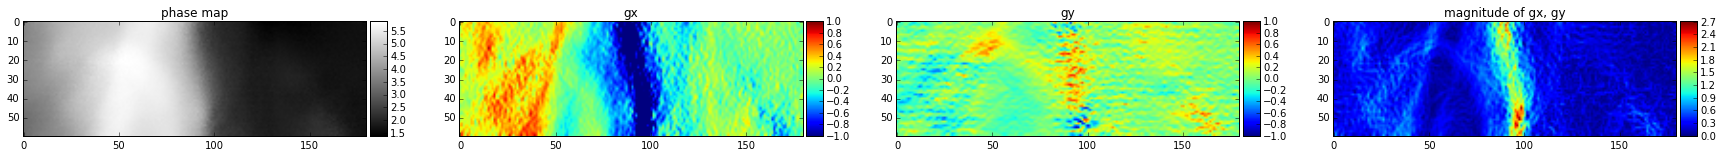

In [278]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase_map = np.zeros(phase_map.shape)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        old_val = phase_map[x, y]
        normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

        
# # img = cv2.imread('box.png',0)

# plt.figure(figsize=(20,10))

# # Output dtype = cv2.CV_8U
# # sobelx8u = cv2.Sobel(normed_phase_map,cv2.CV_8U,1,0,ksize=5)

# # Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
# sobelx64f = cv2.Sobel(normed_phase_map,cv2.CV_64F,1,0,ksize=5)
# abs_sobel64f = np.absolute(sobelx64f)
# sobel_8u = np.uint8(abs_sobel64f)

# plt.subplot(1,2,1),plt.imshow(normed_phase_map,cmap = 'hsv')
# plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.colorbar()
# # plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'hsv')
# # plt.title('Sobel CV_8U'), plt.xticks([]), plt.yt
icks([])
# plt.subplot(1,2,2),plt.imshow(sobel_8u,cmap = 'gray')
# plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

# plt.show()
# plt.colorbar()



import copy
from scipy.ndimage import filters
IMG = copy.deepcopy(p)
imx = np.zeros(IMG.shape)
filters.sobel(IMG, 1, imx)
imy = np.zeros(IMG.shape)
filters.sobel(IMG, 0, imy)

magnitude = np.sqrt(imx**2+imy**2)

plt.figure(figsize=(30,10))

# ax = plt.gca()
# im = ax.imshow(np.arange(100).reshape((10,10)))

# # create an axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# plt.colorbar(im, cax=cax)



from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.subplot(1,4,1)
plt.title('phase map')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
im = ax.imshow(IMG, cmap='gray')
# plt.colorbar()
plt.colorbar(im, cax=cax, cmap='gray')


plt.subplot(1,4,2)
plt.title('gx')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
im = ax.imshow(imx, vmin=-1, vmax=1)
# plt.colorbar()
plt.colorbar(im, cax=cax, cmap='gray')


plt.subplot(1,4,3)
plt.title('gy')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
im = ax.imshow(imy, vmin=-1, vmax=1)
# plt.colorbar()
plt.colorbar(im, cax=cax, cmap='gray')


plt.subplot(1,4,4)
plt.title('magnitude of gx, gy')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
im = ax.imshow(magnitude)
# plt.colorbar()
plt.colorbar(im, cax=cax, cmap='hot')


# plt.imshow(magnitude)
# [nr,nc]=phase_map.shape;
# [dx,dy] = np.gradient(phase_map)
# [x,y] = np.meshgrid(range(nc)+1,range(nr)+1)
# u = dx;
# v = dy;
# quiver(x,y,u,v)

plt.suptitle('')

/media/nas/volume1/widefield/data/JR017W/20160812/JR017W_bar_013Hz/structs/Target_fft_Right_run1_(1, 1)_.pkl.jpg


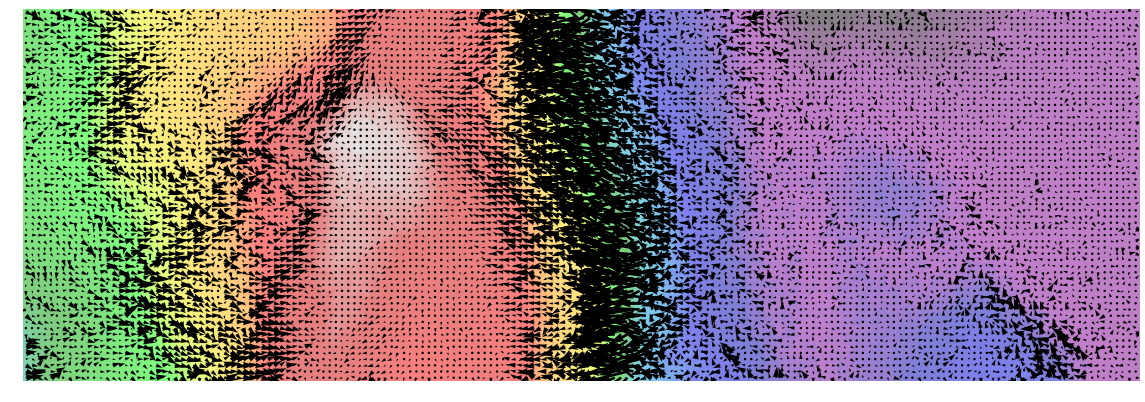

In [225]:
from pylab import *

# plt.subplot(1,2,1)
fig = plt.figure(figsize=(20,10))

plt.imshow(p, cmap='spectral', alpha=0.5)

widths = np.linspace(0, .1, 218)

# plt.subplot(1,2,1)
Q = quiver(gx, gy)


# plt.subplot(1,2,2)
# Q = quiver(gx, gy)


# l,r,b,t = axis()
# dx, dy = r-l, t-b
# axis([l-0.05*dx, r+0.05*dx, b-0.05*dy, t+0.05*dy])

plt.axis('off')

# plt.colorbar()

# if CW:
#     imname = 'GRADIENT_phase_mask_CW_%s_%s' % (currkey, append)
# else:
#     imname = 'GRADIENT_phase_mask_CCW_%s_%s' % (currkey, append)
    
# impath = os.path.join(os.path.split(outdir)[0], 'figures', imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(os.path.split(outdir)[0], 'figures', imname+'.jpg')
# plt.savefig(impath, format='jpg')


print impath

# figpath = os.path.join(os.path.split(outdir)[0], 'figures', 'phase_gradient_%s.jpg' % currkey)
# plt.savefig(figpath)
# print figpath

In [139]:
print p.shape

(164, 218)


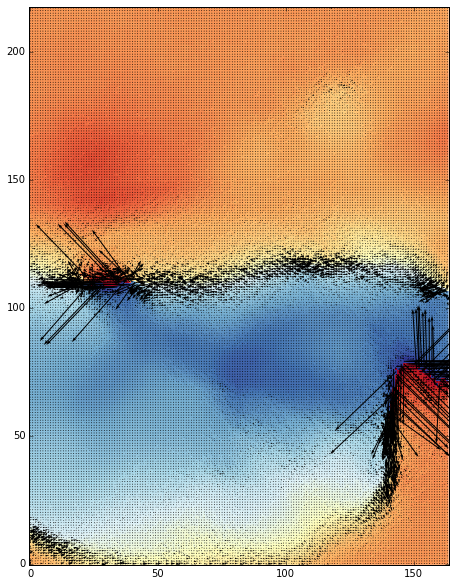

In [175]:
# x = arange(-2.0, 2.0,00.1)
# y = arange(-2.0, 2.0,00.1)
# X,Y = meshgrid(x, y)
X, Y = np.meshgrid(np.arange(0, p.shape[0], 1), np.arange(0, p.shape[1], 1))

Z = shifted_phase_map[X, Y] ##x * np.exp(-x**2 - y**2)
GradX, GradY = np.gradient(Z, 1, 1) # .2, .2)

# GradX = (2*X+Y)
# GradY = (2*Y+X)
figure(figsize=(10, 10))
# im = imshow(Z, cmap=cm.RdYlBu, interpolation='none', extent=[-2,2,-2,2])
im = imshow(Z, cmap=cm.RdYlBu, interpolation='none', origin='lower')

quiver(X, Y, GradX, GradY, angles='xy', scale_units='xy')
show()



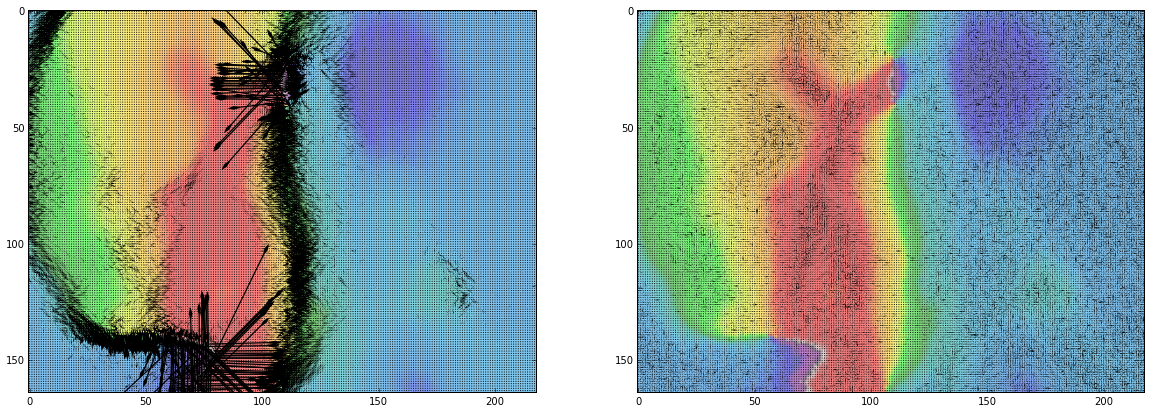

In [177]:

def symlog(x):
    """ Returns the symmetric log10 value """
    return np.sign(x) * np.log10(np.abs(x))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# Generate fake data
# N = 50
# X,Y = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))
# U = np.random.normal(0, 0.2, size=(50, 50))
# V = np.random.normal(0, 0.2, size=(50, 50))

# N = len(gx)

Y, X = np.meshgrid(np.arange(0, p.shape[1], 1), np.arange(0, p.shape[0], 1))
Z = shifted_phase_map[X, Y] ##x * np.exp(-x**2 - y**2)

U, V = np.gradient(Z, 1, 1) # .2, .2)
# U, V = np.gradient(Z, 1, 1) # .2, .2)


# V, U = np.gradient(p)

N = len(V)

# Set RHS data to be larger than LHS
# U[:, N/2:] *= 1000
# V[:, N/2:] *= 1000

angles=np.arctan2(U, V)*180.0/np.pi # calculate angles manually


# #Without scaling
HEAD_LENGTH = 10
# Q = ax1.quiver( X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
#              color='k', units='x', headaxislength=HEAD_LENGTH)
ax1.imshow(p, cmap='spectral', alpha=0.5)

# Q = ax1.quiver( X, Y, U, V,
#              color='k', units='x', headaxislength=HEAD_LENGTH)
Q = ax1.quiver( Y, X, V, U,
             color='k', units='x', headaxislength=HEAD_LENGTH)



# With scaling
# Q = ax2.quiver( X[::3, ::3], Y[::3, ::3], symlog(U[::3, ::3]), symlog(V[::3, ::3]),
#              color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)

ax2.imshow(p, cmap='spectral', alpha=0.5)
# Q = ax2.quiver( X, Y, symlog(U), symlog(V),
#              color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)
Q = ax2.quiver( Y, X, symlog(V), symlog(U),
             color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)

neg = np.where(U<0)

# plt.plot(neg)
# plt.show()

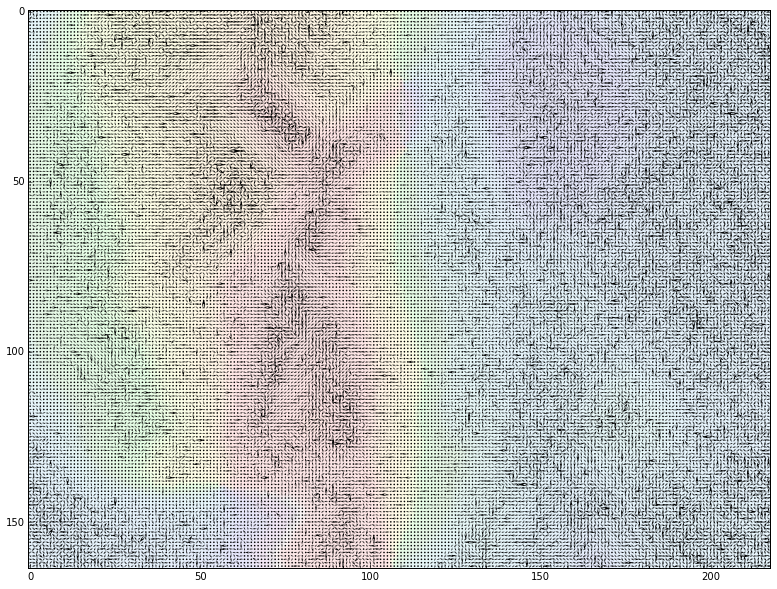

In [166]:
plt.figure(figsize=(20,10))
plt.imshow(p, cmap='spectral', alpha=0.1)
# Q = ax2.quiver( X, Y, symlog(U), symlog(V),
#              color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)
Q = quiver( Y, X, symlog(V), symlog(U),
             color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)

neg = np.where(U<0)

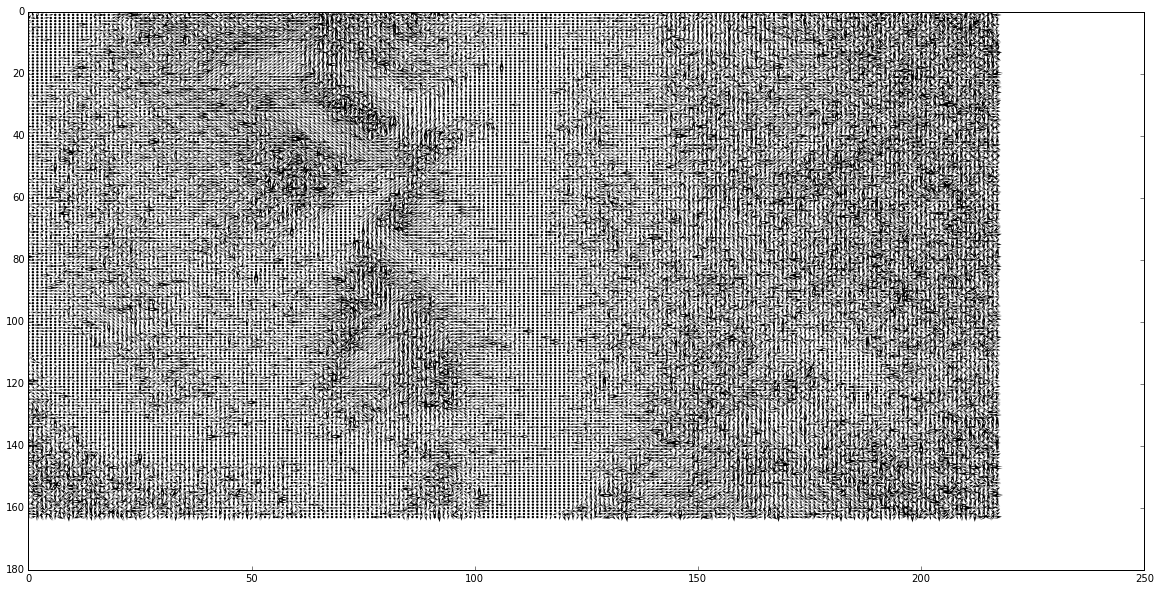

In [167]:
fig = plt.figure(figsize=(20,10))
Q = quiver( Y, X, symlog(V), symlog(U),
             color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)
plt.gca().invert_yaxis()


In [168]:
# fig = plt.figure(figsize=(10,10))

# plt.imshow(p, cmap='spectral', alpha=0.5)
# Q = ax2.quiver( X, Y, symlog(U), symlog(V),
#              color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)

# Q = plt.quiver( Y, X, symlog(V), symlog(U),
#              color='k', units='x', headaxislength=HEAD_LENGTH, angles=angles)

print angles.shape

LOG = np.empty(V.shape)
print symlog(V).shape
for x in range(V.shape[0]):
    for y in range(V.shape[1]):
#         if symlog(V[x,y]) < 0:
#             LOG[x, y] = 0
#         if symlog(V[x,y]) > 0:
#             LOG[x, y] = 1
        if angles[x,y] < 0:
            LOG[x, y] = 0
        if angles[x,y] > 0:
            LOG[x, y] = 1
            
# # plt.imshow(angles)

# fig, ax = plt.subplots(figsize=(20,10))
# ax = plt.subplot(111)

# # strm = ax.streamplot(X, Y, U, V, density=0.6, color=angles, linewidth=5) #=lw*10)
# # strm = ax.streamplot(X, Y, U, V, density=[0.5, 1])
# strm = ax.streamplot(X, Y, U, V, color=np.log10(U), linewidth=2)
# strm = ax.streamplot(Y,X, V, U, color=np.log10(U), linewidth=2)

(218, 164)
(218, 164)


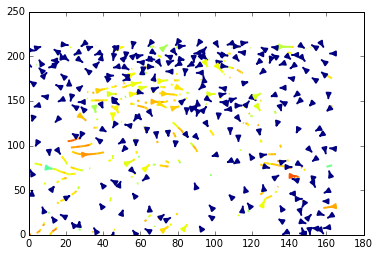

In [169]:
# plt.imshow(angles)



# fig, ax = plt.subplots(figsize=(20,10))
fig, ax = plt.subplots()
ax = plt.subplot(111)

# strm = ax.streamplot(X, Y, U, V, density=0.6, color=angles, linewidth=5) #=lw*10)
# strm = ax.streamplot(X, Y, U, V, density=[0.5, 1])

# plt.imshow(cont_phase_map)




# strm = ax.streamplot(X, Y, U, V, color=np.log10(U), linewidth=2)
# plt.imshow(cont_phase_map, cmap='gray', alpha=0.5, origin='lower')
strm = ax.streamplot(X, Y, U, V, color=np.log10(U), linewidth=2)

# plt.gca().invert_yaxis()


# ax.set_ylim(ax.get_ylim()[::-1])

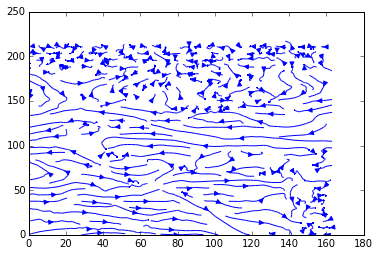

In [170]:
# plt.imshow(cont_phase_map, origin='lower')
# quiver(X, Y, U, V, angles='xy', scale_units='xy')
streamplot(X, Y, V, U)
# axis('off')
plt.show()

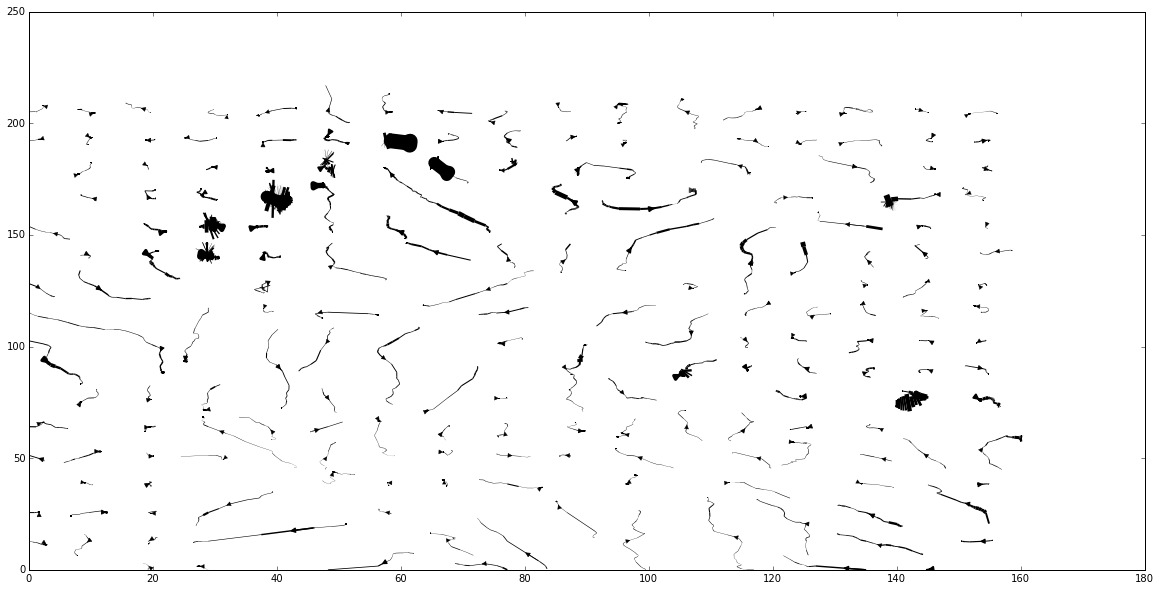

In [71]:
"""
Demo of the `streamplot` function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
"""
import numpy as np
import matplotlib.pyplot as plt


# p = shifted_phase_map

p = cont_phase_map

# Y, X = np.meshgrid(np.arange(0, p.shape[0], 1), np.arange(0, p.shape[1], 1))

X, Y = np.meshgrid(np.arange(0, p.shape[0], 1), np.arange(0, p.shape[1], 1))
Z = shifted_phase_map[X, Y] ##x * np.exp(-x**2 - y**2)

V, U = np.gradient(Z, 1, 1) # .2, .2)


# Y, X = np.mgrid[-3:3:100j, -3:3:100j]
# U = -1 - X**2 + Y
# V = 1 + X - Y**2

speed = np.sqrt(U*U + V*V)

fig, ax = plt.subplots(figsize=(20,10))
ax = plt.subplot(111)
# # strm = ax.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.spectral)
# strm = ax.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.spectral)

# plt.colorbar(strm.lines)

# fig1, (ax1, ax2) = plt.subplots(ncols=2)
# ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
strm = ax.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw*10)

# plt.colorbar(strm.lines)

# plt.show()


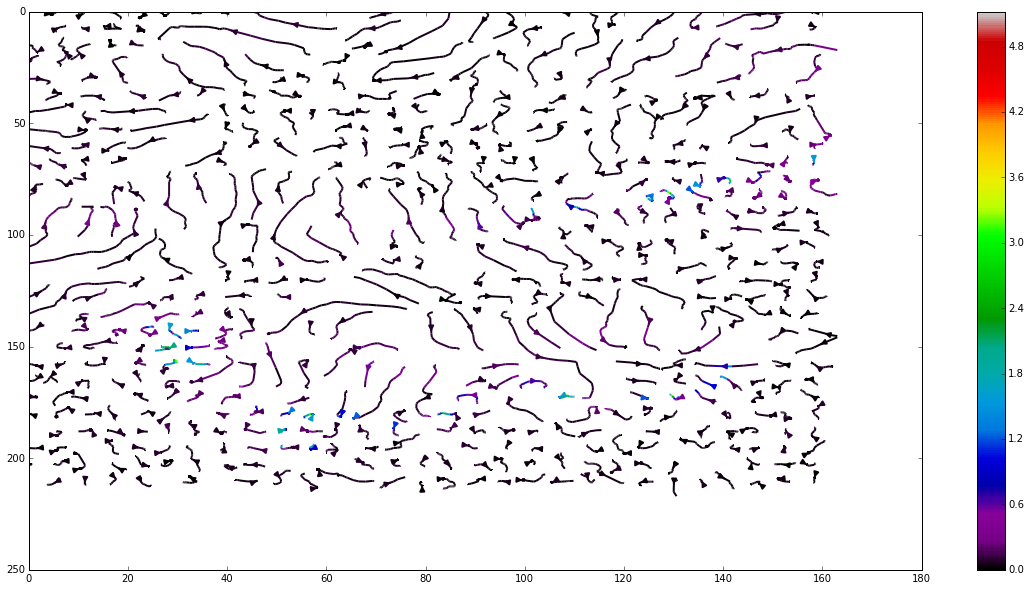

In [72]:

# fig = plt.figure(figsize=(20,10))
speed = np.sqrt(U*U + V*V)

M = (U ** 2 + V ** 2) ** 0.5

fig0, ax0 = plt.subplots(figsize=(20,10))
strm = ax0.streamplot(X, Y, U, V, color=speed, linewidth=2, cmap=plt.cm.spectral, )
fig0.colorbar(strm.lines)

# fig1, (ax1, ax2) = plt.subplots(ncols=2)
# ax1.streamplot(X, Y, U, V, density=[0.5, 1])

# lw = 5*speed / speed.max()
# ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
plt.gca().invert_yaxis()

plt.show()


In [24]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot

# x, y = np.meshgrid(np.linspace(0, len(gx), len(gx)), np.linspace(0, len(gy), len(gy)))
x,y = np.meshgrid(np.arange(0, p.shape[0], 1), np.arange(0, p.shape[1], 1))
z = p[x, y] ##x * np.exp(-x**2 - y**2)

v, u = np.gradient(z, 1, 1) # .2, .2)

# x,y = np.meshgrid(np.arange(0, p.shape[0], 1), np.arange(0, p.shape[1], 1))
# x = range(p.shape[0])
# y = range(p.shape[0])

# u = gx #np.cos(x)*y
# v = gy #np.sin(x)*y

# v, u = np.gradient(p)

print len(y), len(v)

# Create quiver
# fig = FF.create_quiver(x, y, u, v)

# # Create quiver figure
# fig = FF.create_quiver(x, y, u, v,
#                        scale=.25,
#                        arrow_scale=.4,
#                        name='quiver',
#                        line=dict(width=1))


# plot(fig, filename='quiver plot')


218 218


In [ ]:
# Create quiver figure
fig = FF.create_quiver(y, x, u, v)
#                        scale=.25,
#                        arrow_scale=.4,
#                        name='quiver',
#                        line=dict(width=1))


iplot(fig, filename='quiver plot')

<matplotlib.colorbar.Colorbar instance at 0x7effbd1004d0>

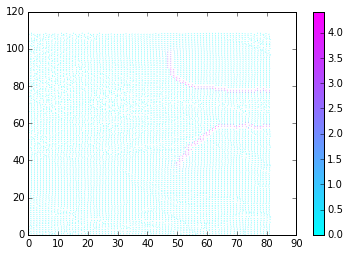

In [59]:
length  = np.sqrt(u**2 + v**2)
 
un = u/length
vn = v/length
 
plt.figure()
plt.quiver(x, y, un, vn,
          length,
          cmap = plt.cm.spectral,
          headlength = 20)
plt.colorbar()
# plt.axis([-1, 7, -1, 7])
# plt.title("scales with x view; pivot='tip'")

In [ ]:
import plotly.graph_objs as go

data = [
    go.Heatmap(
        
        z=shifted_phase_map
    )
]

plot_url = plot(data, filename='heatmap-test')


# plot(fig, filename='quiver plot')